# Overfitting Problem C
## Programming: Select one feature from the Boston Housing dataset to predict the target variable — the median value of owner-occupied homes (MEDV). Use `PolynomialFeatures(degree)` from Scikit-learn library to generate polynomial terms of varying degrees to model nonlinear relationships.

In [1]:
# Andy Nguyen (2025319249)
# SKKU
# Group Activity 6, Group 11
# SWE3050-41

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# 1. fetch data from URL (the alternate Boston dataset text file)
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# the format: alternating rows contain data and then target parts
# combine appropriately:
# raw_df.values[::2, :] gives the “even” rows (0,2,4,…)
# raw_df.values[1::2, :2] gives the first two columns of the “odd” rows
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# inspect shapes for clarity
print("data shape:", data.shape)
print("target shape:", target.shape)

# choose one feature, e.g. the “RM” feature (rooms per dwelling)
# know which column index corresponds to “RM” in this dataset representation.
# if data corresponds to the standard 13 features in order, RM is the 6th (index 5).
X = data[:, 5].reshape(-1, 1)
y = target

# split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# store MSEs
train_mse = []
test_mse = []
degrees = list(range(1, 11))  # degrees range 1-10

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))

<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2365617883.py:16: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


data shape: (506, 13)
target shape: (506,)


## Visualize how the mean square error changes with increasing the model complexity (from 1 to 10).

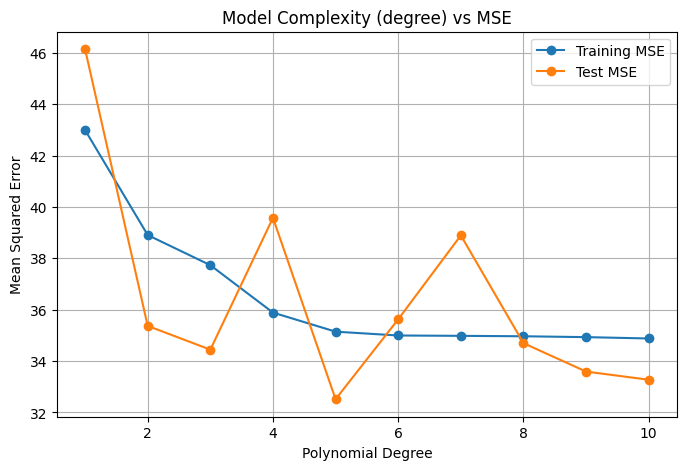

In [2]:
# A. plot MSE vs model complexity (degree 1-10)
plt.figure(figsize=(8, 5))
plt.plot(degrees, train_mse, marker='o', label='Training MSE')
plt.plot(degrees, test_mse, marker='o', label='Test MSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Model Complexity (degree) vs MSE')
plt.legend()
plt.grid(True)
plt.show()

##Visualize three figures to show underfitting, good fit and overfitting with the training data and test data points, the fitted model curves.

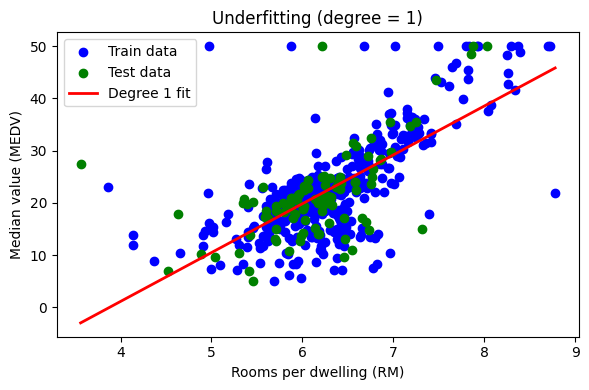

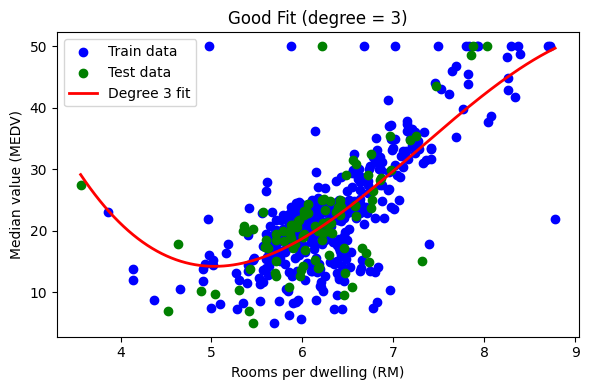

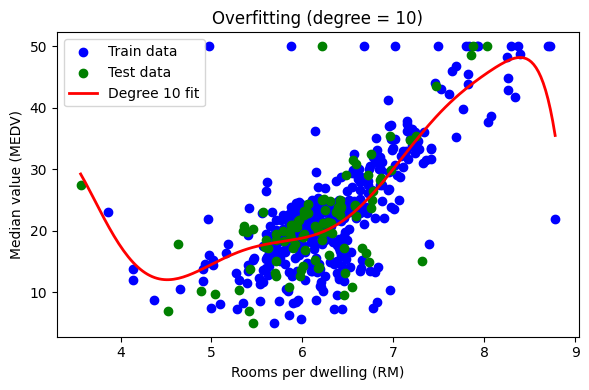

In [3]:
# B. function to plot the fitted curve + data points
def plot_fit(degree, title):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # for smooth curve, sample many X along the range
    X_range = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
    X_range_poly = poly.transform(X_range)
    y_range_pred = model.predict(X_range_poly)

    plt.figure(figsize=(6, 4))
    plt.scatter(X_train, y_train, color='blue', label='Train data')
    plt.scatter(X_test, y_test, color='green', label='Test data')
    plt.plot(X_range, y_range_pred, color='red', linewidth=2, label=f'Degree {degree} fit')
    plt.title(title)
    plt.xlabel('Rooms per dwelling (RM)')
    plt.ylabel('Median value (MEDV)')
    plt.legend()
    plt.tight_layout()
    plt.show()

# underfitting: degree = 1
plot_fit(1, 'Underfitting (degree = 1)')

# "Good" fit: pick some intermediate degree, e.g. degree = 3 or 4
plot_fit(3, 'Good Fit (degree = 3)')

# overfitting: degree = 10
plot_fit(10, 'Overfitting (degree = 10)')